In [2]:
import pandas as pd

# Load the CSV file
csv_file = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Test_blast_SENZOR/LCA_results/viral_clusters_annotated.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Filter out rows where the 'Family' column is 'Unknown'
filtered_df = df[df['Family'] != 'Unknown']

# Save the filtered dataframe back to a CSV file (optional)
filtered_df.to_csv("/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Test_blast_SENZOR/LCA_results/viral_clusters_annotated_filtered_file.csv", index=False)

# Display the filtered dataframe
#print(filtered_df)


In [16]:
import pandas as pd

# Load the original CSV file
input_file = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_merged_csv_files/final_merged_contig_read_counts.csv'
output_file = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_merged_csv_files/contigs_counts_with_coverage.csv'

# Read the original CSV into a DataFrame
count_df = pd.read_csv(input_file)

# Select the required columns
required_columns = ['sample', 'contig_name', 'read_count', 'percent_identity', 'alignment_length', 'contig_length']

# Check if the required columns are in the DataFrame
if all(col in count_df.columns for col in required_columns):
    # Calculate coverage: coverage = read_count / contig_length
    count_df['coverage'] = count_df['read_count'] / count_df['contig_length']

    # Add the percent_id_sign (0 for 100% identity, calculated otherwise)
    count_df['percent_id_sign'] = count_df['percent_identity'].apply(lambda x: '0' if x == 100 else '/')

    # Create a new DataFrame with the selected columns and new columns
    selected_df = count_df[['sample', 'contig_name', 'read_count', 'percent_identity', 'alignment_length', 'coverage', 'percent_id_sign']]
    
    # Save the new DataFrame to a new CSV file
    selected_df.to_csv(output_file, index=False)
    print(f"New CSV file with coverage and percent_id_sign saved at: {output_file}")
else:
    print("Some of the required columns are missing from the input CSV.")

New CSV file with coverage and percent_id_sign saved at: /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_merged_csv_files/contigs_counts_with_coverage.csv


In [10]:
import os
import pandas as pd

import os
import pandas as pd

# Directory containing the files
directory = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/SENZOR_Results/RdRp_candidates_prot.fasta"

# List to store DataFrames
dataframes = []

# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Extract base name ([:2] component as described)
        base_name = "_".join(filename.split("_")[:3])
        # Load the CSV
        df = pd.read_csv(file_path)
        # Add base name as a new column
        df["sample"] = base_name
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame
output_path = os.path.join(directory, "contig_counts.csv")
merged_df.to_csv(output_path, index=False)

output_path


/var/folders/xt/vz8fznds4hdbfcxyds95mtp00000gp/T/ipykernel_32251/340864686.py:20: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


'/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Test_blast_SENZOR/Contig_summary_cluster/contig_counts.csv'

In [3]:
from Bio import SeqIO
import os

# Directory containing the FASTA files
input_dir = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Contigs/"
output_dir = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to extract length from sequence ID
def extract_length(seq_id):
    try:
        length_str = seq_id.split("length_")[1].split("_")[0]
        return int(length_str)
    except (IndexError, ValueError):
        return 0  # Default to 0 if parsing fails

# Process each FASTA file in the input directory
for fasta_file in os.listdir(input_dir):
    if fasta_file.endswith(".fa") or fasta_file.endswith(".fasta"):
        input_path = os.path.join(input_dir, fasta_file)
        output_path = os.path.join(output_dir, fasta_file)

        # Filter sequences by length
        with open(output_path, "w") as output_handle:
            for record in SeqIO.parse(input_path, "fasta"):
                seq_length = extract_length(record.id)
                if seq_length >= 300:
                    SeqIO.write(record, output_handle, "fasta")

        print(f"Processed {fasta_file}: Filtered sequences saved to {output_path}")


Processed AIAMACAT001_S69_657769_modified.fa: Filtered sequences saved to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/AIAMACAT001_S69_657769_modified.fa
Processed AIAMADOG001_S40_657732_modified.fa: Filtered sequences saved to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/AIAMADOG001_S40_657732_modified.fa
Processed AIAMAGOAT001_S48_656109_modified.fa: Filtered sequences saved to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/AIAMAGOAT001_S48_656109_modified.fa
Processed AIAMAGOAT002_S49_656110_modified.fa: Filtered sequences saved to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/AIAMAGOAT002_S49_656110_modified.fa
Processed AIAMAGOAT003_S50_657720_modified.fa: Filtered sequences saved to /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/300_filter/AIAMAGOAT003_S50_657720_modified.fa
Processed AIAMAGOAT004_S51_656112_modified.fa: Filtered sequences saved to

In [9]:
import pandas as pd

# Loading the CSV files
df1 = pd.read_csv(
    "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Non_rodents_16386_Contigs_summary/contig_count.csv"
)
df2 = pd.read_csv(
    "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Rodents/Rodent_senzor_project_16385_summary/1filtered_combined_contig_summary.csv"
)

# Standardizing column names
df1.columns = ["contig", "counts", "length", "coverage", "sample"]
df2.columns = ["contig", "counts", "length", "coverage", "sample"]

# Merging the dataframes
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_path = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Non_rodents_16386_Contigs_summary/merged_contig_count.csv"
merged_df.to_csv(output_path, index=False)

In [3]:
import pandas as pd
from collections import defaultdict, namedtuple
import os
import glob
from Bio import SeqIO

# Define the Member namedtuple
Member = namedtuple('Member', ['contig', 'length', 'percent_id', 'percent_id_sign', 'sample',
                               'coverage', 'uuid', 'reads'])

# Set the base path
base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/'

# Path to contig_count file
count_file_path = os.path.join(base_path, 'final_contig_count.csv')

# Path to cluster file
cluster_file_path = os.path.join(base_path, 'Combined_filtered_500_SENZOR_clsuter.clstr')

# Path to contig files
contig_files_path = os.path.join(base_path, '../Combined_SENZOR_500_Filtered_Contigs')

# Read the contig count file
count_df = pd.read_csv(count_file_path)

# Strip whitespace from 'sample' and 'contig' columns
count_df['uuid'] = (count_df['sample'].str.strip() + '~' + count_df['contig'].str.strip())
count_lookup = {uuid.strip(): counts for uuid, counts in zip(count_df['uuid'], count_df['counts'])}  # Ensure uuid has no whitespace

# Function to parse a single row in the CD-HIT cluster file
def parse_cdhit_row(row):
    if '*' in row:
        index, length, name, percent_id = row.split()
        percent_id_sign, percent_id = '0', 100
    else:
        index, length, name, _, percent_id = row.split()
    length = int(length.strip(',nt'))
    name = name.strip('>').strip('.')
    uuid = name.strip()  # Remove any whitespace from the uuid
    sample, contig = name.split('~')
    coverage = float(contig.split('_')[-1])
    reads = count_lookup.get(uuid.strip(), 0)  # Ensure no whitespace in uuid lookup
    
    if percent_id != 100:
        percent_id_sign, percent_id = percent_id.strip('%').split('/')
        percent_id = float(percent_id)
        
    return Member(contig=contig, sample=sample, length=length,
                  percent_id=percent_id, percent_id_sign=percent_id_sign, coverage=coverage,
                  uuid=uuid, reads=reads)

# Parse the cluster file and store the results
clusters = defaultdict(list)
with open(cluster_file_path, 'r') as file:
    for line in file:
        if line.startswith('>Cluster'):
            cluster_id = line.split()[-1]
        else:
            member = parse_cdhit_row(line)
            if 'water' in member.sample.lower():
                continue
            clusters[cluster_id].append(member)

# Function to get the representative contig of a cluster
def get_representative(cluster):
    representative = [member for member in cluster if member.percent_id_sign == '0'][0]
    return representative

# Fetch the cluster IDs of representative contigs
fetch = {}
for clustID in clusters:
    try:
        representative_contig = get_representative(clusters[clustID])
        fetch[representative_contig.uuid.strip()] = clustID  # Use full UUID (sample~contig)
    except Exception as e:
        print(f"{clustID} failed: {e}")

# Write the representative contigs to a new file
representative_file_path = os.path.join(base_path, 'representative_contigs.fasta')
with open(representative_file_path, 'w') as store_representatives:

    # Setup logging
    log_file_path = os.path.join(base_path, 'process_log.txt')
    with open(log_file_path, 'w') as log_file:

        # Initialize counter for representative sequences written
        representative_count = 0

        # Loop through contig files and write the representative contigs
        for contig_file in glob.glob(os.path.join(contig_files_path, '*.fa')):
            log_file.write(f"Processing file: {contig_file}\n")  # Log file path
            for seq in SeqIO.parse(contig_file, format='fasta'):
                # Use the full sequence ID
                full_contig_id = seq.id.strip()

                # Check if the full sequence ID exists in fetch
                if full_contig_id in fetch:
                    cluster_id = fetch[full_contig_id]
                    sample = full_contig_id.split('~')[0]  # Extract the sample name from the sequence ID

                    # Write the representative contig to the output file
                    store_representatives.write(f'>{cluster_id}|{sample}|{full_contig_id}\n{str(seq.seq)}\n')

                    # Increment the representative sequence counter
                    representative_count += 1
                else:
                    log_file.write(f"Contig {seq.id} not found in fetch\n")  # Log contigs not found in fetch

        # Print the number of representative sequences written
        print(f"Number of representative sequences written: {representative_count}")

Number of representative sequences written: 320917


In [5]:
import re
longestORF=re.compile('[A-Z]+') ## longest ORF is delimited by *

RdRp_motifs=re.compile('GDD|GDN|SDD|ADN') ## RdRp catalytic domain residues

repr_contig_path = os.path.join(base_path, 'representative_contigs.fasta')  # path to representative contigs
RdRp_candidates = open(os.path.join(base_path, 'RdRp_candidates.fasta'), 'w')  # file to store contigs likely to be polymerases
RdRp_candidate_proteins = open(os.path.join(base_path, 'RdRp_candidates_prot.fasta'), 'w')  # file to store proteins likely to be polymerases

c=0
t=0

for seq in SeqIO.parse(open(repr_contig_path,'r'),format='fasta'): ## iterate over representative contigs
    candidateORFs=[]
    candidateProt=[]
    
    for s,sequence in enumerate([seq.seq,seq.seq.complement()[::-1]]): ## fwd+rev
        for i in range(3): ## reading frames
            
            translation=str(sequence[i:].translate()) ## translate direction+frame
            
            for protein in longestORF.findall(translation): ## find all proteins
#                 if RdRp_motifs.search(protein) and len(protein)>200: ## protein has RdRp-like motif and is longer than 200 amino acids
                if len(protein)>200:
                    candidateORFs.append(sequence) ## add sequence for later
                    candidateProt.append(protein)
                    
    if len(candidateORFs)>0:
        c+=1
        RdRp_candidates.write('>%s\n%s\n'%(seq.id,seq.seq))
        for p in range(len(candidateProt)):
            RdRp_candidate_proteins.write('>%s|%s\n%s\n'%(seq.id,p,candidateProt[p]))
    t+=1
    
RdRp_candidates.close()
RdRp_candidate_proteins.close()

print(c,t,c/t)

/Users/ifeanyi/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


49736 320917 0.15498088290741843


In [30]:
import os
import re
from Bio import SeqIO

longestORF = re.compile('[A-Z]+')  # longest ORF is delimited by *

# Motifs for DNA polymerase and POL (reverse transcriptase motif)
dna_polymerase_motif = re.compile(r'[DNH][LIVM][DNH][A-Z][DN][KR][DNH][KR]')
pol_motif = re.compile(r'YMDD')

base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Non_rodents_16386_Contigs_summary/'  # adjust to your working directory if needed
repr_contig_path = os.path.join(base_path, '../Cluster_contigs/representative_contigs.fasta')  # path to representative contigs

DNA_candidates = open(os.path.join(base_path, '../Cluster_contigs/DNA_candidates.fasta'), 'w')  # file to store contigs likely to have these motifs
DNA_candidate_proteins = open(os.path.join(base_path, '../Cluster_contigs/DNA_candidates_prot.fasta'), 'w')  # file to store proteins

c = 0
t = 0

for seq in SeqIO.parse(open(repr_contig_path, 'r'), format='fasta'):  # iterate over representative contigs
    candidateORFs = []
    candidateProt = []
    
    for s, sequence in enumerate([seq.seq, seq.seq.complement()[::-1]]):  # fwd+rev
        for i in range(3):  # reading frames
            translation = str(sequence[i:].translate())  # translate direction+frame
            
            # Find all ORFs (longest ORFs delimited by '*')
            for protein in longestORF.findall(translation):
                # Check length and if at least one of the motif sets matches
                if len(protein) > 200 and (dna_polymerase_motif.search(protein) or pol_motif.search(protein)):
                    candidateORFs.append(sequence)
                    candidateProt.append(protein)
    
    # If we found candidate ORFs, write the sequence and proteins
    if len(candidateORFs) > 0:
        c += 1
        DNA_candidates.write('>%s\n%s\n' % (seq.id, seq.seq))
        for p, prot_seq in enumerate(candidateProt):
            DNA_candidate_proteins.write('>%s|%s\n%s\n' % (seq.id, p, prot_seq))
    t += 1
    
DNA_candidates.close()
DNA_candidate_proteins.close()

print(c, t, c/t if t > 0 else 0)


/Users/ifeanyi/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


219 218754 0.0010011245508653557


In [7]:
%%bash
 #Define the paths
candidates_fasta="/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.fasta"
profiledb="/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/RDRP_SENZOR/RdRp_profiles/RdRp_profiles.pssm.txt"
output_file="${candidates_fasta/.fasta/.pssm.out}"

# Run hmmscan
hmmscan --noali -o "$output_file" "$profiledb" "$candidates_fasta"

# Check if hmmscan ran successfully
if [ $? -eq 0 ]; then
    echo "hmmscan completed successfully."
    echo "Output written to: $output_file"
else
    echo "hmmscan failed. Please check the input files and paths."
fi

hmmscan completed successfully.
Output written to: /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.pssm.out


In [24]:
%%bash

# Set the base path where alignments are kept
base_path="/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/RDRP_SENZOR/NEW_DNA/" ## where alignments are kept

# Change to the base directory
cd "$base_path" || { echo "Failed to change directory to $base_path"; exit 1; }

# Iterate over each alignment file matching *.alignment.full
for msa in *.alignment.full; do
    echo "Processing: $msa"
    
    # Generate the output filename by replacing '_full' with '_pssm.txt'
    out="${msa/.alignment.full/_pssm.txt}"
    
    # Build the PSSM using hmmbuild
    hmmbuild "$out" "$msa" || { echo "hmmbuild failed for $msa"; exit 1; }
done

# Concatenate all PSSM files into a single file
cat *_pssm.txt > DNA_profiles.pssm.txt || { echo "Failed to concatenate PSSM files"; exit 1; }

# Compress the concatenated PSSM file for search using hmmpress
hmmpress -f DNA_profiles.pssm.txt || { echo "hmmpress failed for DNA_profiles.pssm.txt"; exit 1; }

echo "PSSM profiles successfully built and compressed."


Processing: Baculo_gp64_PF03273.alignment.full
# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.4 (Aug 2023); http://hmmer.org/
# Copyright (C) 2023 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             Baculo_gp64_PF03273.alignment.full
# output HMM file:                  Baculo_gp64_PF03273_pssm.txt
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     Baculo_gp64             26   682   470     1.54  0.591 Baculovirus gp64 envelope glycoprotein family

# CPU time: 0.19u 0.00s 00:00:00.19 Elapsed: 00:00:00.19
Processing: DNA_pol_A_PF00476.alignment.full
# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.4 (A

In [17]:
from Bio import SearchIO
import os

# Assuming base_path is defined
hitfile = os.path.join(base_path, 'RdRp_candidates_prot.pssm.out')

# Use SearchIO.parse with the correct format
hits = SearchIO.parse(hitfile, 'hmmer3-text')

RdRp_clusters = set()
total = 0

for query in hits:
    if len(query.hits) > 0:
        # Clean up query.id
        query_id = query.id.split()[0]  # Remove any trailing info like [L=...]
        split_id = query_id.split('|')
        cluster_name = split_id[0]
        sample = split_id[1]
        contig_name = '|'.join(split_id[2:])

        families = [hit.id for hit in query.hits]
        print('%s' % ('|'.join(split_id[:-1])))

        for hit in query.hits:
            if hit.evalue < 1e-5:
                print('%s: %s' % (hit.id, hit.evalue))
                RdRp_clusters.add(cluster_name)
            else:
                print('not significant', hit.id, hit.evalue)
        print()

    total += 1

count = len(RdRp_clusters)
print(len(RdRp_clusters))
print('%s hits out of %s (no hits: %s; fraction: %s)' % (count, total, total - count, count / total))

634|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_2_length_7182_cov_27.368473
PicornaRdRp_PF00680_full: 9.8e-127
LuteoTotiRotaRdRp_PF02123_full: 1.5e-11
Partitiviridae_ICTV_Mafft_211216_full: 1.2e-06

654|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_3_length_7105_cov_56.967843
PicornaRdRp_PF00680_full: 1.4e-77
LuteoTotiRotaRdRp_PF02123_full: 7e-09

10127|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_29_length_2169_cov_11.483748
PicornaRdRp_PF00680_full: 4e-31
Partitiviridae_ICTV_Mafft_211216_full: 4.9e-14
LuteoTotiRotaRdRp_PF02123_full: 6.4e-06

32555|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_101_length_1251_cov_35.916525
PicornaRdRp_PF00680_full: 2.9e-32
LuteoTotiRotaRdRp_PF02123_full: 4.9e-16
Partitiviridae_ICTV_Mafft_211216_full: 2.2e-09
narna_rdrp: 1.1e-07

57806|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_174_length_952_cov_1.581714
PicornaRdRp_PF00680_full: 4.4e-85
LuteoTotiRotaRdRp_PF02123_full: 2.8e-13
Part

In [ ]:
%%bash

hmmscan --domtblout /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.domtblout \
/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/RDRP_SENZOR/RdRp_profiles/RdRp_profiles.pssm.txt \
/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.fasta

# hmmscan :: search sequence(s) against a profile database
# HMMER 3.4 (Aug 2023); http://hmmer.org/
# Copyright (C) 2023 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query sequence file:             /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.fasta
# target HMM database:             /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/RDRP_SENZOR/RdRp_profiles/RdRp_profiles.pssm.txt
# per-dom hits tabular output:     /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/RdRp_candidates_prot.domtblout
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       537|AIAMA_GOT005_OS_S43_673459|AIAMA_GOT005_OS_S43_673459~NODE_1_length_7583_cov_13.795497|0  [L=876]
Scores for complete sequence (score includes all domains):
   --- full sequence

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  269|AIAMA_PIG003_RS_S51_673463|AIAMA_PIG003_RS_S51_673463~NODE_6_length_9927_cov_9.090964|4 1309 V------------------ELEKARDLTQKAVDLAKQAED 1330
                                                                                                   1..................111222222222222222222 PP

                                                                    MononegaRdRp_PF00946_full  216 eseellseklleeekkselkeleskarskk 245 
                                                                                                   ++ e++++ +++ ++ +el++l+++  + k
  269|AIAMA_PIG003_RS_S51_673463|AIAMA_PIG003_RS_S51_673463~NODE_6_length_9927_cov_9.090964|4 1331 KLAEITADGKVTPQEVEELTKLNEEVAKAK 1360
                                                                                                   222222222222222222222222222222 PP

  == domain 2  score: -0.1 bits;  conditional E-value: 0.0078
                                                                    MononegaRdRp_PF00946_full  142 asaeeeellasllkal

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (312 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual nu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (207 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 3361.52
//
Query:       108177|AIAMA_PIG003_RS_S51_673463|AIAMA_PIG003_RS_S51_673463~NODE_773_length_704_cov_1.261563|0  [L=229]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (273 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         1  (0.05); expected 0.4 (0.02)
Passed bias filter:                        1  (0.05); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 3076.18
//
Query:       80250|AIAMA_SHP006_OS_S48_673466|AIAMA_SHP006_OS_S48_673466~NODE_253_length_800_cov_1.770401|0  [L=220]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (278 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         1  (0.05); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 4336.72
//
Query:       41432|AIAMACAT001_S69_657769|AIAMACAT001_S69_657769~NODE_131_length_1088_cov_1.767557|0  [L=362]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (335 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         2  (0.1); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 5836.73
//
Query:       11737|AIAMADOG001_S40_657732|AIAMADOG001_S40_657732~NODE_46_length_2005_cov_2.532676|1  [L=273]
Scores for complete sequence (score includ

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 4644.80
//
Query:       48486|AIAMADOG001_S40_657732|AIAMADOG001_S40_657732~NODE_263_length_1009_cov_3.437768|0  [L=238]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
---------------

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (219 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 2404.25
//
Query:       71137|AIAMADOG001_S40_657732|AIAMADOG001_S40_657732~NODE_464_length_845_cov_1.230469|1  [L=208]
Scores for complete sequence (score include

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 2953.18
//
Query:       99618|AIAMADOG001_S40_657732|AIAMADOG001_S40_657732~NODE_709_length_728_cov_1.566820|0  [L=242]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
----------------

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (216 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 2775.79
//
Query:       131842|AIAMADOG001_S40_657732|AIAMADOG001_S40_657732~NODE_981_length_651_cov_1.000000|1  [L=216]
Scores for complete sequence (score includ

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (382 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 5088.36
//
Query:       9284|AIAMADOG002_OS_S64_673467|AIAMADOG002_OS_S64_673467~NODE_48_length_2217_cov_1.214019|0  [L=739]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-val

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Query sequence(s):                         1  (260 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00.00
# Mc/sec: 3870.91
//
Query:       80212|AIAMADOG002_OS_S64_673467|AIAMADOG002_OS_S64_673467~NODE_465_length_800_cov_1.113416|0  [L=266]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (448 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (460 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 6758.14
//
Query:       21735|AIAMAGOAT001_S48_656109|AIAMAGOAT001_S48_656109~NODE_182_length_1493_cov_13.

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (206 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         1  (0.05); expected 0.4 (0.02)
Passed bias filter:                        1  (0.05); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 2122.62
//
Query:       40943|AIAMAGOAT001_S48_656109|AIAMAGOAT001_S48_656109~NODE_386_length_1095_cov_3.400786|0  [L=231]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 3864.39
//
Query:       64796|AIAMAGOAT001_S48_656109|AIAMAGOAT001_S48_656109~NODE_652_length_882_cov_2.119255|0  [L=258]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (243 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual nu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 2881.03
//
Query:       154313|AIAMAGOAT001_S48_656109|AIAMAGOAT001_S48_656109~NODE_1389_length_614_cov_1.752328|1  [L=204]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00.00
# Mc/sec: 2789.20
//
Query:       16190|AIAMAGOAT002_S49_656110|AIAMAGOAT002_S49_656110~NODE_151_length_1728_cov_1.864325|0  [L=382]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (382 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         1  (0.05); expected

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Passed MSV filter:                         1  (0.05); expected 0.4 (0.02)
Passed bias filter:                        1  (0.05); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 4769.19
//
Query:       31738|AIAMAGOAT002_S49_656110|AIAMAGOAT002_S49_656110~NODE_353_length_1239_cov_0.919966|1  [L=280]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No hits detected that satisfy reporting thresholds]


Domain annotatio

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Domain annotation for each model (and alignments):

   [No targets detected that satisfy reporting thresholds]


Internal pipeline statistics summary:
-------------------------------------
Query sequence(s):                         1  (209 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 1488.10
//
Query:       45259|AIAMAGOAT002_S49_656110|AIAMAGOAT002_S49_656110~NODE_569_length_1043_cov_2.692547|0  [L=347]
Scores for complete sequence (score inclu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Query sequence(s):                         1  (264 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 4019.80
//
Query:       60797|AIAMAGOAT002_S49_656110|AIAMAGOAT002_S49_656110~NODE_831_length_908_cov_1.033694|0  [L=302]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Description
    ------- ------ -----    -----

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



-------------------------------------
Query sequence(s):                         1  (274 residues searched)
Target model(s):                          20  (16251 nodes)
Passed MSV filter:                         0  (0); expected 0.4 (0.02)
Passed bias filter:                        0  (0); expected 0.4 (0.02)
Passed Vit filter:                         0  (0); expected 0.0 (0.001)
Passed Fwd filter:                         0  (0); expected 0.0 (1e-05)
Initial search space (Z):                 20  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00.00
# Mc/sec: 4223.04
//
Query:       75255|AIAMAGOAT002_S49_656110|AIAMAGOAT002_S49_656110~NODE_1078_length_824_cov_0.938420|1  [L=262]
Scores for complete sequence (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Model    Descri

In [11]:
import os
from Bio import SearchIO
base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results//'

# Define the path to your domtblout file
domtblout_file = os.path.join(base_path, 'RdRp_candidates_prot.domtblout')

# Parse the domtblout file
records = SearchIO.parse(domtblout_file, 'hmmscan3-domtab')

In [13]:
### from Bio import SearchIO
import os

# Define the base path (modify as necessary)
#base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/SENZOR_Results/'

# Define the path to your domtblout file
domtblout_file = os.path.join(base_path, 'RdRp_candidates_prot.domtblout')

# Parse the domtblout file
records = SearchIO.parse(domtblout_file, 'hmmscan3-domtab')

# Dictionary to store contig_key to pssm mapping
contig_pssm_dict = {}

for record in records:
    # Extract the query ID and clean it
    query_id = record.id.split()[0]
    contig_key = query_id

    # Initialize a set to store unique PSSM hits for this contig
    pssm_hits = set()

    # Iterate over the hits for this query
    for hit in record.hits:
        # Check the e-value threshold
        if hit.evalue < 1e-5:
            # Add the hit ID to the pssm_hits set
            pssm_hits.add(hit.id)
    
    # If there are hits, add them to the dictionary
    if pssm_hits:
        if contig_key in contig_pssm_dict:
            contig_pssm_dict[contig_key].update(pssm_hits)
        else:
            contig_pssm_dict[contig_key] = pssm_hits

# Define the output TSV file path
output_tsv_path = os.path.join(base_path, 'contig_pssm_hits.tsv')

# Open the file for writing
with open(output_tsv_path, 'w') as out_file:
    # Write the header
    out_file.write('contig_key\tpssm\n')
    
    # Iterate over the contig_pssm_dict
    for contig_key, pssm_hits in contig_pssm_dict.items():
        # Join the PSSM hits with commas
        pssm_list = ','.join(sorted(pssm_hits))
        # Write the line to the TSV file
        out_file.write(f'{contig_key}\t{pssm_list}\n')

In [15]:
import pandas as pd

# Load the TSV file
tsv_file_path = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/contig_pssm_hits.tsv"  # Replace with your TSV file path
tsv_df = pd.read_csv(tsv_file_path, sep="\t")

# Extract the contig IDs from the contig_key
tsv_df['contig_id'] = tsv_df['contig_key'].str.split('|').str[2]

# Path to your cluster file
cluster_file_path = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/Combined_filtered_500_SENZOR_clsuter.clstr"  # Replace with your actual file path

# Initialize storage for clusters of interest
clusters_of_interest = {}

# Read the cluster file and map clusters to contigs
current_cluster_id = None
current_cluster_lines = []

with open(cluster_file_path, 'r') as file:
    for line in file:
        line = line.rstrip('\n')
        if line.startswith(">Cluster"):
            # If we were collecting lines, save the cluster
            if current_cluster_lines:
                clusters_of_interest[current_cluster_id] = current_cluster_lines
                current_cluster_lines = []
            # Start a new cluster
            current_cluster_id = int(line.split()[1])
            current_cluster_lines.append(line)
        else:
            current_cluster_lines.append(line)
    # Add the last cluster if any
    if current_cluster_lines:
        clusters_of_interest[current_cluster_id] = current_cluster_lines

# Search for contigs in clusters and include all lines for matching clusters
result = []

for cluster_id, cluster_lines in clusters_of_interest.items():
    match_found = False
    for line in cluster_lines[1:]:  # Skip the cluster header
        if not line.startswith(">"):
            contig = line.split(">")[-1].split("...")[0].strip()  # Extract the contig name
            if contig in tsv_df['contig_id'].values:
                match_found = True
                break  # Stop checking further, as we include the entire cluster
    if match_found:
        result.append({"ClusterID": cluster_id, "Lines": cluster_lines})

# Output the results
output_file = "/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Combined_SENZOR_results/clusters_with_multiple_matches.txt"  # Replace with your desired output path

with open(output_file, 'w') as output:
    for cluster in result:
        cluster_id = cluster['ClusterID']
        lines = cluster['Lines']
        output.write(f">Cluster {cluster_id}\n")
        for line in lines[1:]:  # Include all lines in the cluster
            output.write(f"{line}\n")
        output.write("\n")

# Example of printing to the console
for cluster in result:
    cluster_id = cluster['ClusterID']
    lines = cluster['Lines']
    print(f">Cluster {cluster_id}")
    for line in lines[1:]:  # Include all lines in the cluster
        print(f"{line}")
    print("\n")

>Cluster 17
0	10332nt, >AINWZGOAT004_S44_1_656183~NODE_3_length_10332_cov_382.208874... at -/98.78%
1	1160nt, >AINWZGOAT004_S44_1_656183~NODE_152_length_1160_cov_527.255771... at -/99.57%
2	29205nt, >SENONOWISUGOT001_RS_S74_673659~NODE_1_length_29205_cov_133.285841... *
3	618nt, >SENONOWISUGOT005_RS_S71_673662~NODE_476_length_618_cov_1.201479... at -/94.82%
4	1694nt, >SEZONOWIFSHEEP001_S33_656082~NODE_103_length_1694_cov_1.507112... at -/98.94%
5	1158nt, >SEZONOWIFSHEEP001_S33_656082~NODE_210_length_1158_cov_1.340426... at -/98.62%
6	680nt, >SEZONOWIFSHEEP001_S33_656082~NODE_618_length_680_cov_1.663350... at -/99.71%
7	503nt, >SEZONOWIFSHEEP001_S33_656082~NODE_1380_length_503_cov_1.042254... at -/100.00%


>Cluster 30
0	23492nt, >SEZONOWOGDOG014_S21_657751~NODE_2_length_23492_cov_7.914755... *


>Cluster 74
0	844nt, >SENONOWGOT014_OS_S75_673628~NODE_295_length_844_cov_2.071708... at -/97.39%
1	789nt, >SENONOWGOT014_OS_S75_673628~NODE_332_length_789_cov_2.200843... at -/98.73%
2	517nt, 

In [187]:
from Bio.Blast import NCBIXML
import pandas as pd

# Paths to your files
rpsblast_xml_file = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_megahit_contigs/rpsblast_results.xml'
cdd_annotations_file = '/Volumes/aine_store/CDD_DB/cddid_all.tbl'

# Load CDD annotations
cdd_annotations = {}
with open(cdd_annotations_file) as f:
    for line in f:
        if line.startswith('#') or not line.strip():
            continue
        parts = line.strip().split('\t')
        if len(parts) >= 5:
            pssm_id, accession, short_name, incomplete, superfamily = parts[:5]
            cdd_annotations[pssm_id] = {
                'PSSM-ID': pssm_id,
                'Accession': accession,
                'Short name': short_name,
                'Incomplete': incomplete,
                'Superfamily': superfamily
            }

# Parse the RPS-BLAST XML output
with open(rpsblast_xml_file) as result_handle:
    blast_records = NCBIXML.parse(result_handle)
    data = []

    for blast_record in blast_records:
        query_id = blast_record.query
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                # Extract the accession number
                full_hit_id = alignment.hit_id  # e.g., 'gnl|CDD|313063'
                hit_id = full_hit_id.split('|')[-1]  # e.g., '313063'
                e_value = hsp.expect
                bitscore = hsp.bits
                from_pos = hsp.query_start
                to_pos = hsp.query_end

                # Get annotations from cdd_annotations using PSSM-ID
                ann = cdd_annotations.get(hit_id, {})
                data_row = {
                    'Query': query_id,
                    'Hit type': 'superfamily' if ann.get('Superfamily') else 'specific',
                    'PSSM-ID': ann.get('PSSM-ID', ''),
                    'From': from_pos,
                    'To': to_pos,
                    'E-Value': e_value,
                    'Bitscore': bitscore,
                    'Accession': ann.get('Accession', ''),
                    'Short name': ann.get('Short name', ''),
                    'Incomplete': ann.get('Incomplete', ''),
                    'Superfamily': ann.get('Superfamily', '')
                }
                data.append(data_row)

# Create DataFrame and save to TSV
df = pd.DataFrame(data)
df = df[['Query', 'Hit type', 'PSSM-ID', 'From', 'To', 'E-Value', 'Bitscore',
         'Accession', 'Short name', 'Incomplete', 'Superfamily']]
output_tsv_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_megahit_contigs/domain_hits.tsv'
df.to_csv(output_tsv_path, sep='\t', index=False)


ExpatError: unclosed token: line 128966, column 34

In [31]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=400
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import glob,os
from collections import Counter, defaultdict, namedtuple
from Bio import SeqIO
import os
import glob
from Bio import SeqIO
from collections import Counter

In [45]:
import os
import glob
from Bio import SeqIO
from collections import Counter

# Base path setup
base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/contigs/'

# Step 1: Gather samples with valid `.fa` files, excluding those with "water" in the filename
samples = set()
for fasta_file in glob.glob(os.path.join(base_path, '*/.fa')):
    print(f"Checking file: {fasta_file}")
    sequences = SeqIO.parse(fasta_file, format='fasta')
    sample_contigs = {s.id: s.seq for s in sequences}
    if sample_contigs and 'water' not in fasta_file.lower():
        sample_name = os.path.basename(os.path.dirname(fasta_file))
        samples.add(sample_name)
        print(f"Added sample: {sample_name}")

# Step 2: Process CSV file to populate `virus_sample_combinations`
virus_sample_combinations = set()
header = None
csv_path = os.path.join(base_path, '../Scylla_merged_csv_files/LCA_complete_final_merged_contig_read_counts_with_dark_contigs.csv')

print(f"Opening CSV file: {csv_path}")

with open(csv_path, 'r') as file:
    for line in file:
        row = line.strip('\n').split(',')
        
        # Check and initialize header
        if row[0] == 'sample':
            header = {name: index for index, name in enumerate(row)}
            print("Header found:", header)
            continue  # Skip to the next line
        
        # Only proceed if header is defined
        if header:
            try:
                # Process only curated samples with a valid cluster value
                if row[header['curated']] == 'True' and row[header['cluster']].strip():
                    pol_group = int(float(row[header['cluster']]))
                    sample = row[header['sample']]
                    virus_sample_combinations.add(f"{pol_group}|{sample}")
                    #print(f"Added combination: {pol_group}|{sample}")
            except KeyError as e:
                print(f"KeyError: {e} - Missing column in header")
            except ValueError as e:
                print(f"ValueError: {e} - Invalid data in 'cluster' field for line: {row}")

# Step 3: Build `sample_virus_list` dictionary mapping each sample to its associated virus groups
sample_virus_list = {
    s.split('|')[1]: [entry.split('|')[0] for entry in virus_sample_combinations if entry.split('|')[1] == s.split('|')[1]]
    for s in virus_sample_combinations
}
# Add empty lists for samples with no virus associations
for sample in samples:
    if sample not in sample_virus_list:
        sample_virus_list[sample] = []
    print(f"Sample {sample} virus list: {sample_virus_list[sample]}")

# Step 4: Summarize virus counts and print sample statistics
virus_count = {sample: len(viruses) for sample, viruses in sample_virus_list.items()}
sample_coinfections = Counter(virus_count)

for count in set(sample_coinfections.values()):
    samples_with_count = [sample for sample, virus_num in sample_coinfections.items() if virus_num == count]
    print(f"\nNumber of viruses: {count} (in {len(samples_with_count)} samples): {', '.join(samples_with_count)}")

# Step 5: Write results to the output file
output_path = os.path.join(base_path, '../Scylla_merged_csv_files/TableSX_coinfection.tsv')
with open(output_path, 'w') as out_file:
    out_file.write('sample\tcluster\n')
    for sample, viruses in sample_virus_list.items():
        out_file.write(f"{sample}\t{', '.join(viruses)}\n")
    print(f"Results written to: {output_path}")


Opening CSV file: /Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/contigs/../Scylla_merged_csv_files/LCA_complete_final_merged_contig_read_counts_with_dark_contigs.csv
Header found: {'sample': 0, 'contig_name': 1, 'contig_length': 2, 'read_count': 3, 'subject': 4, 'percent_identity': 5, 'alignment_length': 6, 'mismatches': 7, 'gap_opens': 8, 'q_start': 9, 'q_end': 10, 's_start': 11, 's_end': 12, 'evalue': 13, 'bit_score': 14, 'nt': 15, 'nr': 16, 'hexapoda': 17, 'nt_or_nr': 18, 'taxid_blast': 19, 'blasted': 20, 'taxon_group_blast': 21, 'taxid_curated': 22, 'rdrp': 23, 'name': 24, 'segment': 25, 'curated': 26, 'taxon_group': 27, 'genus': 28, 'family': 29, 'aligned_bases': 30, 'best_hit': 31, 'valid_hit': 32, 'dark_contig': 33, 'cluster': 34, 'pol_group': 35, 'coverage': 36, 'percent_id_sign': 37}

Number of viruses: 5 (in 1 samples): SEZONOWISSHEEP001_S32

Number of viruses: 32 (in 2 samples): AINWZLIZARD001_S58, SEZONOWISDOGOO1_S19

Number of viruses: 34 (in 1 samples): 

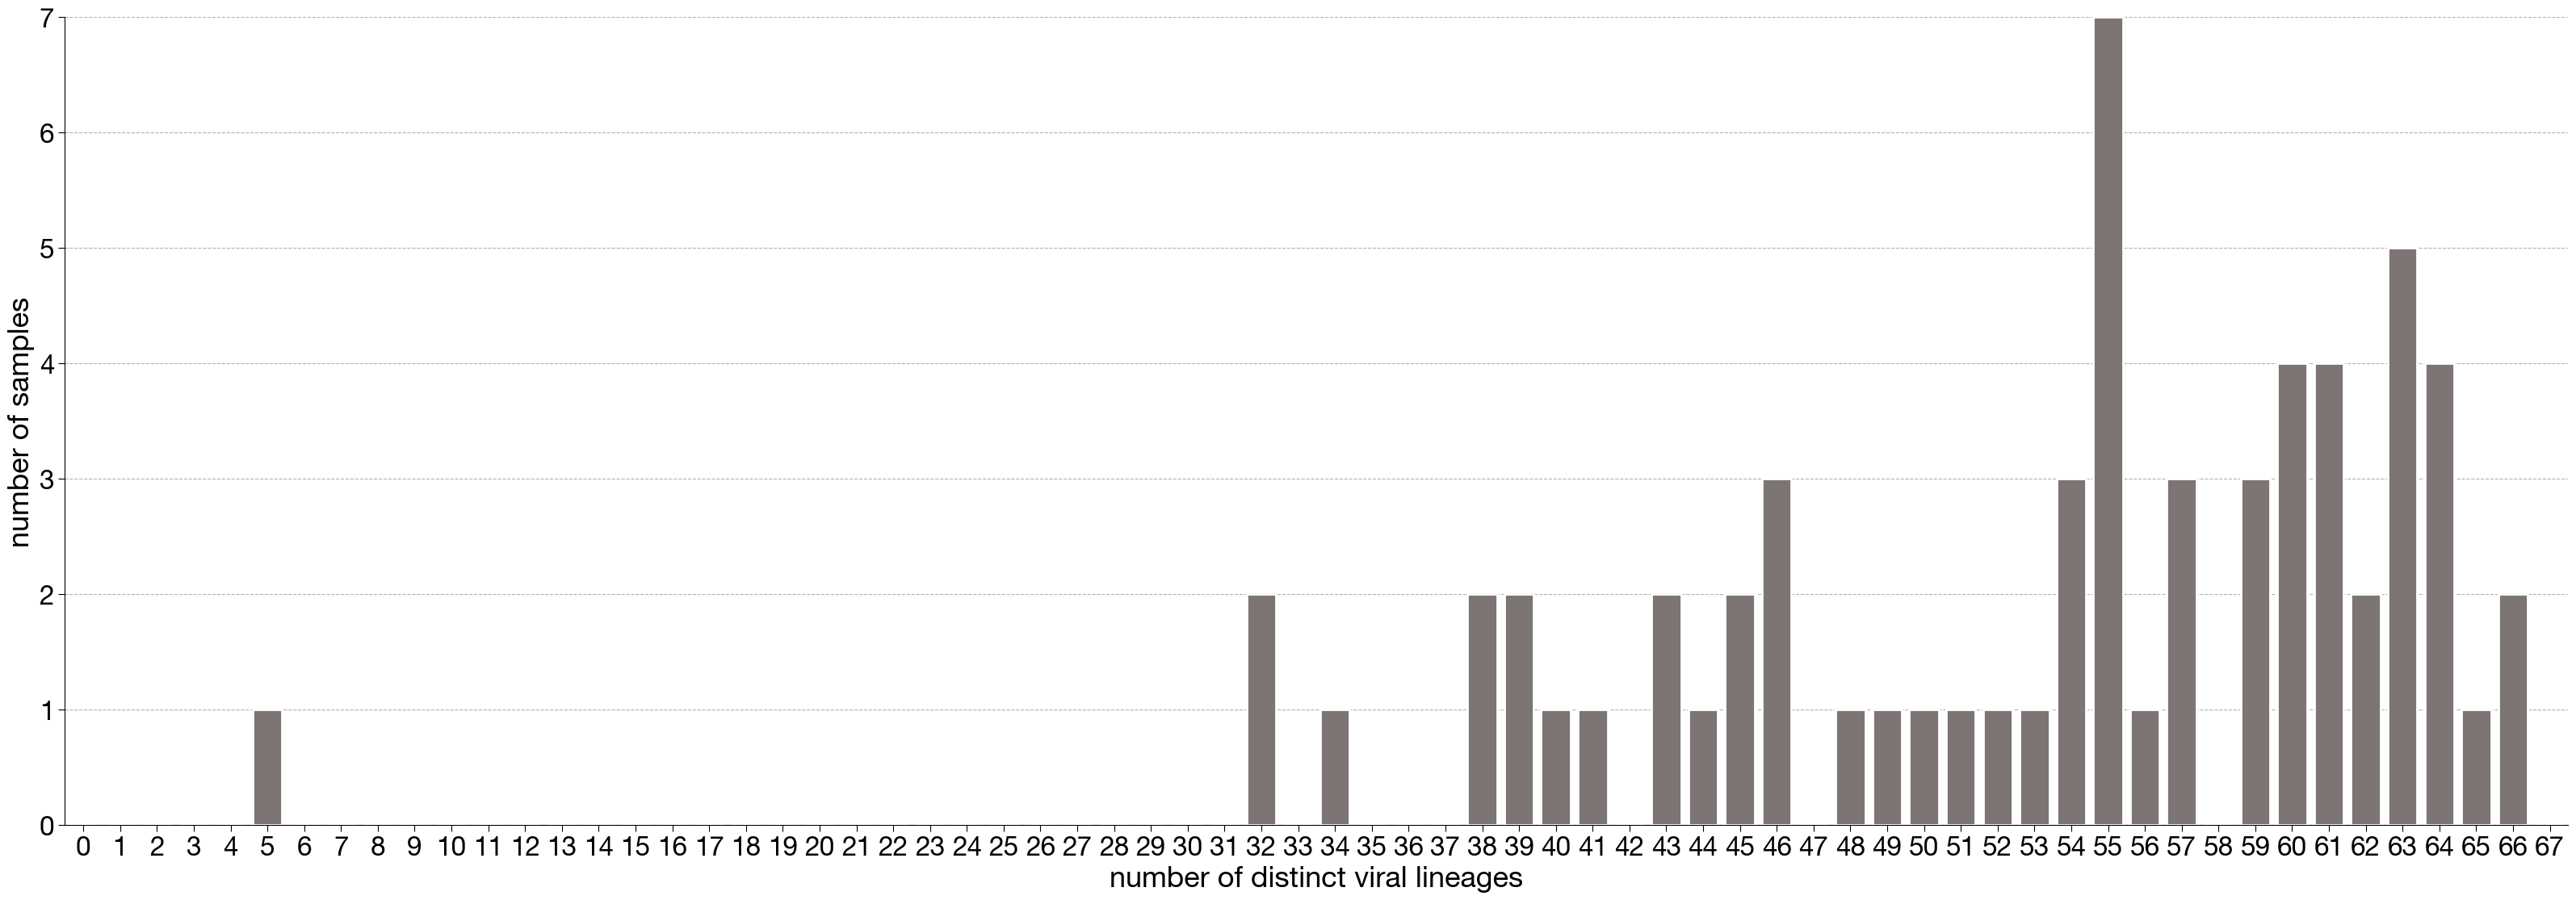

In [60]:
fig = plt.figure(figsize=(40,13),facecolor='w')
gs = gridspec.GridSpec(1,1)
ax=plt.subplot(gs[0],facecolor='w')

freqs=sample_coinfections.values()
bins=range(0,max(freqs)+3)
ax.hist(freqs,bins=bins,align='left',facecolor='#7C7574',edgecolor='w',rwidth=0.8,lw=2,zorder=10)

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.set_xticks(bins)
ax.set_xlim(-0.5,max(bins)-0.5)
ax.set_ylim(0,7)

ax.grid(axis='y',ls='--')
ax.tick_params(which='major',size=6,labelsize=24)
ax.tick_params(which='minor',size=4,labelsize=0)

ax.set_ylabel('number of samples',size=26)
ax.set_xlabel('number of distinct viral lineages',size=26)

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['left','bottom']]

plt.savefig('/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/figS2_coinfection.pdf',dpi=300,bbox_inches='tight')
plt.savefig('/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/figS2_coinfection.png',dpi=300,bbox_inches='tight')
plt.show()

Metadata loaded successfully.
Total virus-sample combinations found: 2750


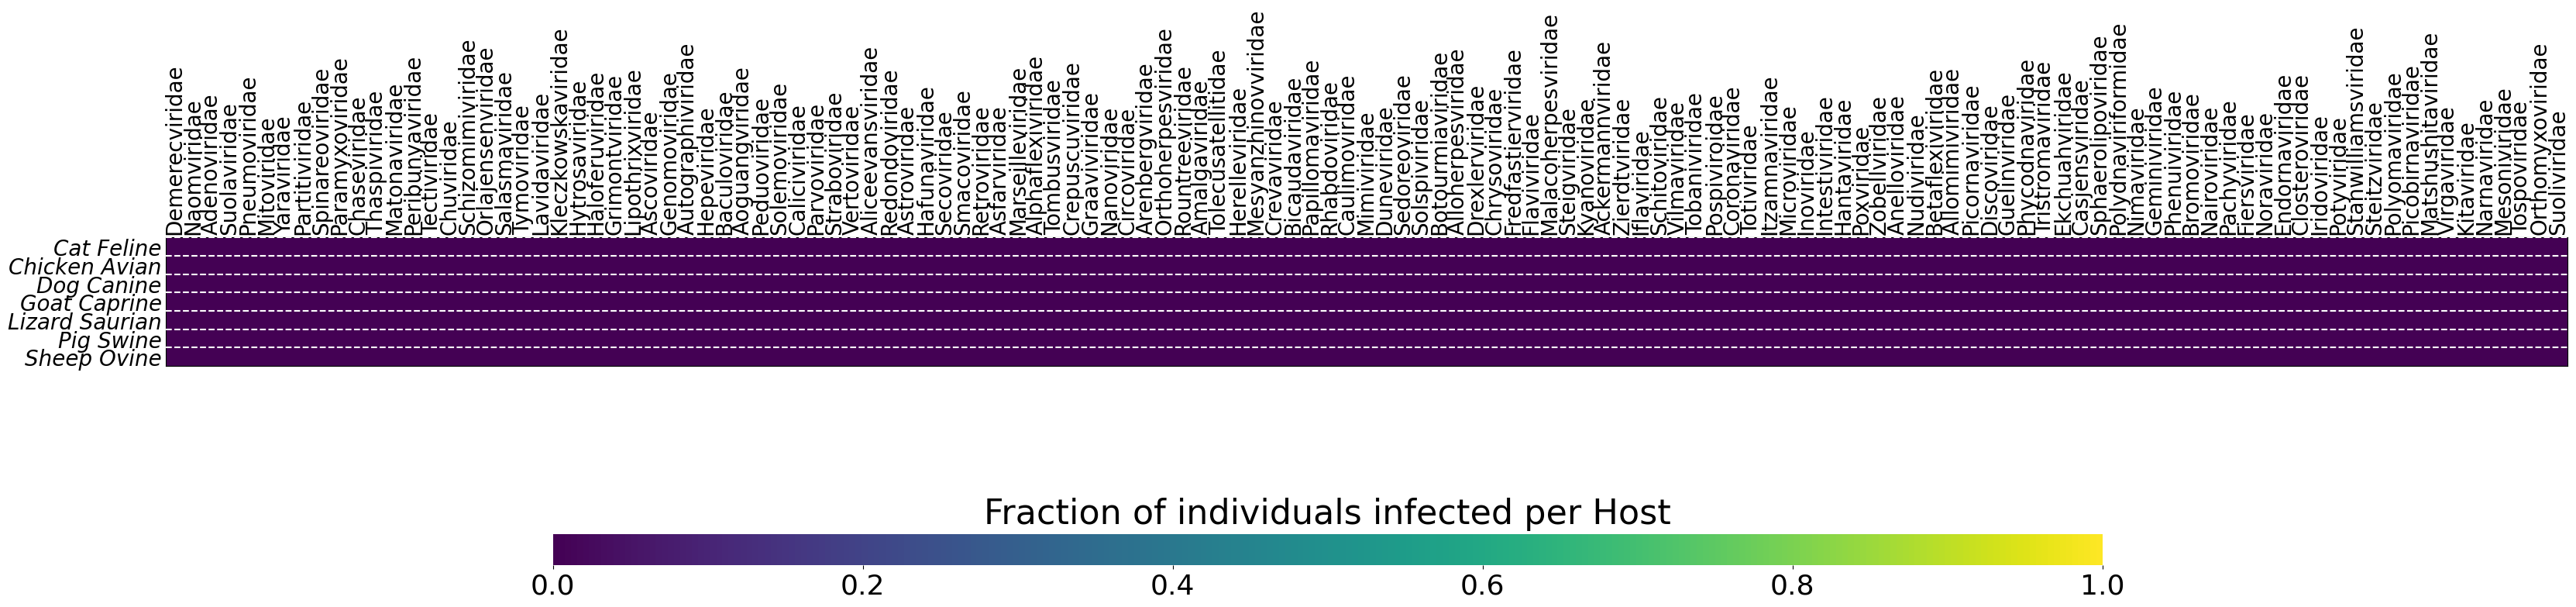

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from collections import Counter

# Define paths
base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/contigs/'
csv_file_path = os.path.join(base_path, '../Scylla_merged_csv_files/LCA_complete_final_merged_contig_read_counts_with_dark_contigs.csv')
metadata_file_path = os.path.join(base_path, '../Metdata_senzor_project.csv')

# Step 1: Load the main CSV file with low_memory=False
virus_df = pd.read_csv(csv_file_path, low_memory=False)

# Step 2: Load metadata with pandas, using 'NewIDseqName' as the index
metadata_df = pd.read_csv(metadata_file_path, dtype=str, index_col='NewIDseqName').fillna('')
print("Metadata loaded successfully.")

# Convert metadata DataFrame to a dictionary format
metadata = metadata_df.to_dict(orient='index')  # Each key is NewIDseqName, each value is a dictionary of attributes

# Step 3: Extract virus-sample combinations from `virus_df`
virus_sample_combinations = set()
for _, row in virus_df.iterrows():
    sample = row['sample']
    virus_name = row['family']
    if pd.notna(sample) and pd.notna(virus_name):
        virus_sample_combinations.add(f"{virus_name}|{sample}")
print(f"Total virus-sample combinations found: {len(virus_sample_combinations)}")

# Define function to get species information with default for missing samples
def sample_species(k):
    return f"{metadata[k]['ska_genus']} {metadata[k]['ska_species']}" if k in metadata else 'Unknown Species'

spp = [sample_species(s) for s in metadata]
species = set(spp)
spp_count = Counter(spp)

# Convert spp_count to a Series for alignment with DataFrame rows
spp_count_series = pd.Series(spp_count).reindex(species, fill_value=1)

# Prepare data structure for heatmap
viruses = set([k.split('|')[0] for k in virus_sample_combinations])
vir_species = {v: {s: 0 for s in species} for v in viruses}

# Populate vir_species counts from virus_sample_combinations
for c in virus_sample_combinations:
    v, s = c.split('|')
    species_name = sample_species(s)
    # Only proceed if the species_name exists in vir_species[v]
    if species_name in vir_species[v]:
        vir_species[v][species_name] += 1

# Step 4: Plotting
fig = plt.figure(figsize=(40, 40), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0], facecolor='w')

# Create DataFrame from `vir_species`
df = pd.DataFrame.from_dict(vir_species)
df = df[sorted(vir_species, key=lambda w: -sum(vir_species[w].values()))]
df = df.reindex(sorted(species, key=lambda w: (w, -spp_count[w])))

# Check if DataFrame is populated before plotting
if not df.empty:
    # Normalize by species count using spp_count_series
    df = df.divide(spp_count_series, axis='rows')
    heatmap = ax.matshow(df, cmap=mpl.cm.viridis)

    # Add text annotations to each cell
    for c, col in enumerate(df.columns):
        for r, row in enumerate(df.index):
            count = vir_species[col][row]
            if count > 0:
                total = spp_count_series[row]
                frac = count / total
                fc = 'k' if frac >= 0.4 else 'w'
                ax.text(c, r, f'{frac:.03f}\n({count}/{total})', color=fc, va='center', ha='center')

    # Draw horizontal lines between genera
    store_genus = None
    for s, S in enumerate(sorted(species, key=lambda w: (w, -spp_count[w]))):
        if store_genus != S.split(' ')[0]:
            ax.axhline(s - 0.5, color='w', ls='--', zorder=100)
        store_genus = S.split(' ')[0]

    # Customize axis labels
    ax.set_yticks(range(len(df.index)))
    ax.set_yticklabels(df.index, style='italic')

    ax.xaxis.tick_top()
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=90)

    # Set tick parameters
    ax.tick_params(size=0, labelsize=20)
    ax.set_aspect(1)

    # Add color bar
    axcb = fig.add_axes([0.25, 0.41, 0.5, 0.01], frame_on=False)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=mpl.cm.viridis, orientation='horizontal', alpha=1.0, drawedges=False)
    axcb.xaxis.set_label_position('top')
    axcb.set_xlabel('Fraction of individuals infected per Host', size=32)
    axcb.xaxis.labelpad = 10
    axcb.tick_params(labelsize=26)

    plt.show()
else:
    print("DataFrame is empty after processing, skipping heatmap.")


In [3]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_merged_csv_files/1complete_final_merged_contig_read_counts_with_family_genus_names.csv'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Extract unique families from the 'family' column
unique_families = df['family'].unique()

# Output the unique family names
unique_families


array([nan, 'Retroviridae', 'Rountreeviridae', 'Solemoviridae',
       'Peduoviridae', 'Schitoviridae', 'Autographiviridae',
       'Straboviridae', 'Casjensviridae', 'Circoviridae',
       'Orthoherpesviridae', 'Baculoviridae', 'Phycodnaviridae',
       'Parvoviridae', 'Alloherpesviridae', 'Steitzviridae',
       'Papillomaviridae', 'Peribunyaviridae', 'Caliciviridae',
       'Phenuiviridae', 'Nudiviridae', 'Zierdtviridae',
       'Aliceevansviridae', 'Genomoviridae', 'Ackermannviridae',
       'Flaviviridae', 'Hantaviridae', 'Paramyxoviridae', 'Poxviridae',
       'Mimiviridae', 'Herelleviridae', 'Schizomimiviridae',
       'Ascoviridae', 'Potyviridae', 'Naomviridae', 'Sedoreoviridae',
       'Fiersviridae', 'Kyanoviridae', 'Iridoviridae',
       'Mesyanzhinovviridae', 'Arenbergviridae', 'Anelloviridae',
       'Tobaniviridae', 'Inoviridae', 'Picornaviridae', 'Coronaviridae',
       'Astroviridae', 'Demerecviridae', 'Matonaviridae',
       'Orthomyxoviridae', 'Lavidaviridae', 'Allomi

In [ ]:
import requests
import time

# List of virus families
virus_families = [
    'Retroviridae', 'Rountreeviridae', 'Solemoviridae', 'Peduoviridae', 'Schitoviridae',
    'Autographiviridae', 'Straboviridae', 'Casjensviridae', 'Circoviridae', 'Orthoherpesviridae',
    'Baculoviridae', 'Phycodnaviridae', 'Parvoviridae', 'Alloherpesviridae', 'Steitzviridae',
    'Papillomaviridae', 'Peribunyaviridae', 'Caliciviridae', 'Phenuiviridae', 'Nudiviridae',
    'Zierdtviridae', 'Aliceevansviridae', 'Genomoviridae', 'Ackermannviridae', 'Flaviviridae',
    'Hantaviridae', 'Paramyxoviridae', 'Poxviridae', 'Mimiviridae', 'Herelleviridae', 'Schizomimiviridae',
    'Ascoviridae', 'Potyviridae', 'Naomviridae', 'Sedoreoviridae', 'Fiersviridae', 'Kyanoviridae',
    'Iridoviridae', 'Mesyanzhinovviridae', 'Arenbergviridae', 'Anelloviridae', 'Tobaniviridae',
    'Inoviridae', 'Picornaviridae', 'Coronaviridae', 'Astroviridae', 'Demerecviridae', 'Matonaviridae',
    'Orthomyxoviridae', 'Lavidaviridae', 'Allomimiviridae', 'Adenoviridae', 'Polydnaviriformidae',
    'Polyomaviridae', 'Vilmaviridae', 'Suoliviridae', 'Grimontviridae', 'Geminiviridae', 'Stanwilliamsviridae',
    'Discoviridae', 'Drexlerviridae', 'Yaraviridae', 'Picobirnaviridae', 'Salasmaviridae', 'Tospoviridae',
    'Chaseviridae', 'Sphaerolipoviridae', 'Mitoviridae', 'Pospiviroidae', 'Steigviridae', 'Intestiviridae',
    'Matshushitaviridae', 'Nimaviridae', 'Malacoherpesviridae', 'Graaviviridae', 'Rhabdoviridae',
    'Duneviridae', 'Bicaudaviridae', 'Fredfastierviridae', 'Marseilleviridae', 'Tolecusatellitidae',
    'Solspiviridae', 'Betaflexiviridae', 'Itzamnaviridae', 'Alphaflexiviridae', 'Smacoviridae',
    'Ekchuahviridae', 'Spinareoviridae', 'Zobellviridae', 'Vertoviridae', 'Redondoviridae', 'Guelinviridae',
    'Nairoviridae', 'Tectiviridae', 'Hafunaviridae', 'Orlajensenviridae', 'Partitiviridae', 'Secoviridae',
    'Pachyviridae', 'Haloferuviridae', 'Caulimoviridae', 'Suolaviridae', 'Tristromaviridae', 'Pneumoviridae',
    'Closteroviridae', 'Chrysoviridae', 'Botourmiaviridae', 'Asfarviridae', 'Kitaviridae', 'Narnaviridae',
    'Iflaviridae', 'Hepeviridae', 'Amalgaviridae', 'Endornaviridae', 'Crepuscuviridae', 'Thaspiviridae',
    'Mesoniviridae', 'Tymoviridae', 'Hytrosaviridae', 'Aoguangviridae', 'Crevaviridae', 'Microviridae',
    'Bromoviridae', 'Chuviridae', 'Kleczkowskaviridae', 'Nanoviridae', 'Tombusviridae', 'Noraviridae',
    'Virgaviridae', 'Totiviridae', 'Lipothrixviridae'
]
# NCBI E-utilities API base URL
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"

# Function to query NCBI for proteins related to virus families
def search_ncbi(query):
    params = {
        'db': 'protein',
        'term': f'{query} AND "viruses"[porgn] AND "pfam"[filter]',
        'retmode': 'json',
        'retmax': '10'  # Adjust the number of results
    }
    response = requests.get(base_url, params=params)
    
    # Check if the response is empty or not valid JSON
    if response.status_code == 200:
        try:
            return response.json()
        except ValueError:  # Catch JSON decoding errors
            print(f"[ERROR] No JSON response or invalid JSON for query: {query}")
            print(f"Response content: {response.text[:500]}")  # Print first 500 chars of the response for debugging
            return None
    else:
        print(f"[ERROR] HTTP {response.status_code} for query: {query}")
        print(f"Response content: {response.text[:500]}")  # Print first 500 chars of the response for debugging
        return None

# Process each virus family
for family in virus_families:
    print(f"Searching NCBI for: {family}")
    result = search_ncbi(family)
    
    if result and 'esearchresult' in result:
        idlist = result['esearchresult'].get('idlist', [])
        if idlist:
            print(f"{family} found {len(idlist)} protein entries: {idlist}")
        else:
            print(f"No proteins found for: {family}")
    else:
        print(f"No results found or error for: {family}")
    
    print("\n")
    
    # Sleep for 1 second to avoid hitting rate limits
    time.sleep(1)

Searching NCBI for: Retroviridae
No proteins found for: Retroviridae


Searching NCBI for: Rountreeviridae
No proteins found for: Rountreeviridae


Searching NCBI for: Solemoviridae
No proteins found for: Solemoviridae


Searching NCBI for: Peduoviridae
No proteins found for: Peduoviridae


Searching NCBI for: Schitoviridae
No proteins found for: Schitoviridae


Searching NCBI for: Autographiviridae
No proteins found for: Autographiviridae


Searching NCBI for: Straboviridae
No proteins found for: Straboviridae


Searching NCBI for: Casjensviridae
No proteins found for: Casjensviridae


Searching NCBI for: Circoviridae
No proteins found for: Circoviridae


Searching NCBI for: Orthoherpesviridae
No proteins found for: Orthoherpesviridae


Searching NCBI for: Baculoviridae
No proteins found for: Baculoviridae


Searching NCBI for: Phycodnaviridae
No proteins found for: Phycodnaviridae


Searching NCBI for: Parvoviridae
No proteins found for: Parvoviridae




In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import glob, os
from collections import Counter, defaultdict, namedtuple
from Bio import SeqIO

# Set font properties for plotting
typeface = 'Helvetica Neue'
mpl.rcParams['font.weight'] = 400
mpl.rcParams['axes.labelweight'] = 300
mpl.rcParams['font.family'] = typeface
mpl.rcParams['font.size'] = 22

# Base path to the contigs directory
base_path = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/contigs/'

# Step 1: Identify samples that are not 'water' and have assembled contigs
samples = set()  # This will hold the samples with contigs
for f in glob.glob(os.path.join(base_path, '*_megahit_assembled_contigs.fa')):  # Match all your supplied contigs
    cs = SeqIO.parse(f, format='fasta')  # Load contigs from the fasta file
    s = {s.id: s.seq for s in cs}  # Convert sequences to a dictionary
    if len(s) > 0 and 'water' not in f.lower():  # Check that contigs exist and aren't from water samples
        sample_name = os.path.basename(f).replace('_megahit_assembled_contigs.fa', '')  # Extract sample name
        samples.add(sample_name)  # Add the sample name to the set

# Step 2: Build the virus-sample combinations
virus_sample_combinations = set()
virus_sample_file = os.path.join(base_path, '11complete_final_merged_contig_read_counts_with_family_genus_names.csv')  # Specify the correct path to the virus-sample file
header = {}

# Open the virus sample combinations file
with open(virus_sample_file, 'r') as infile:
    for line in infile:
        l = line.strip('\n').split('\t')
        if l[0] == 'sample':
            header = {x: i for i, x in enumerate(l)}  # Store header column positions
        elif l[header['curated']] == 'True':
            pol_group = int(float(l[header['poly_group']]))
            sample = l[header['sample']]
            virus_sample_combinations.add(f'{pol_group}|{sample}')

# Step 3: Map virus groups to their respective samples
sample_virus_list = {s.split('|')[1]: [w.split('|')[0] for w in virus_sample_combinations if w.split('|')[1] == s.split('|')[1]] for s in virus_sample_combinations}

# Step 4: Assign empty lists for samples without viruses
for s in samples:
    if s not in sample_virus_list:
        sample_virus_list[s] = []

# Step 5: Count viruses for each sample
virus_count = {s: len(sample_virus_list[s]) for s in sample_virus_list}
sample_coinfections = Counter(virus_count)

# Step 6: Output the number of viruses found in each sample and the samples they are found in
for count in set(sample_coinfections.values()):
    S = [sample for sample in sample_coinfections if sample_coinfections[sample] == count]
    print(f'\nNumber of viruses: {count} (in {len(S)} samples): {", ".join(S)}')

# Step 7: Write the results into a TSV file
output_file = '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/Scylla_merged_csv_files/TableSX_1complete_final_merged.tsv'
with open(output_file, 'w') as out:
    out.write('sample\tpol_groups\n')
    for sample in sample_virus_list:
        out.write(f'{sample}\t{", ".join(sample_virus_list[sample])}\n')

print(f"Results saved to {output_file}")

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/aine_store/SENZOR_project/SPlited_SENSOR_porject/IDseq/contigs/11complete_final_merged_contig_read_counts_with_family_genus_names.csv'